In [2]:
import pandas as pd

# We use read_excel instead of read_csv because your file ends in .xlsx
df = pd.read_excel('Online Retail.xlsx')

# This will show the first 5 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
# 1. Remove rows where CustomerID is missing (we can't analyze anonymous sales)
df = df.dropna(subset=['CustomerID'])

# 2. Remove transactions with negative quantities (these are usually returns/errors)
df = df[df['Quantity'] > 0]

# 3. Create a 'TotalSales' column (Quantity * Price)
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

print("Data Cleaned!")
df.head()


Data Cleaned!


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


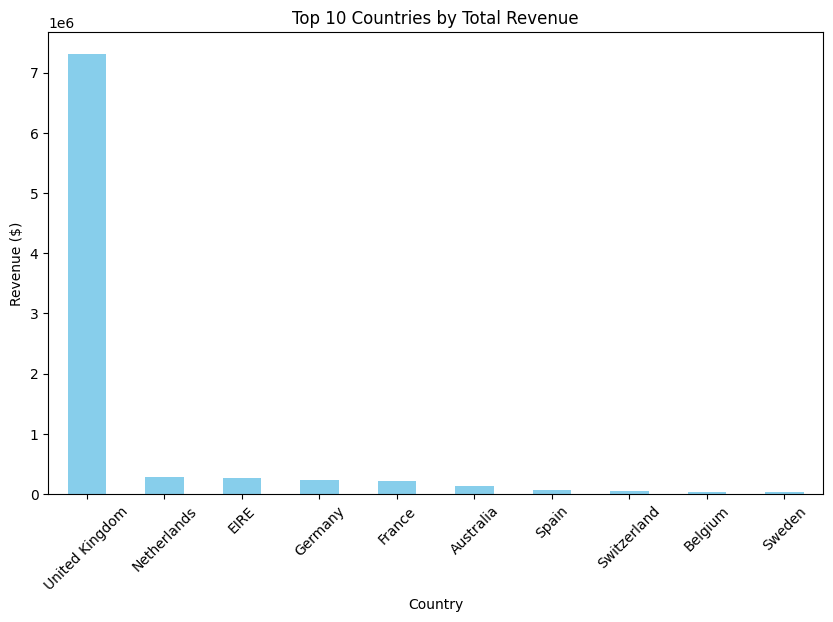

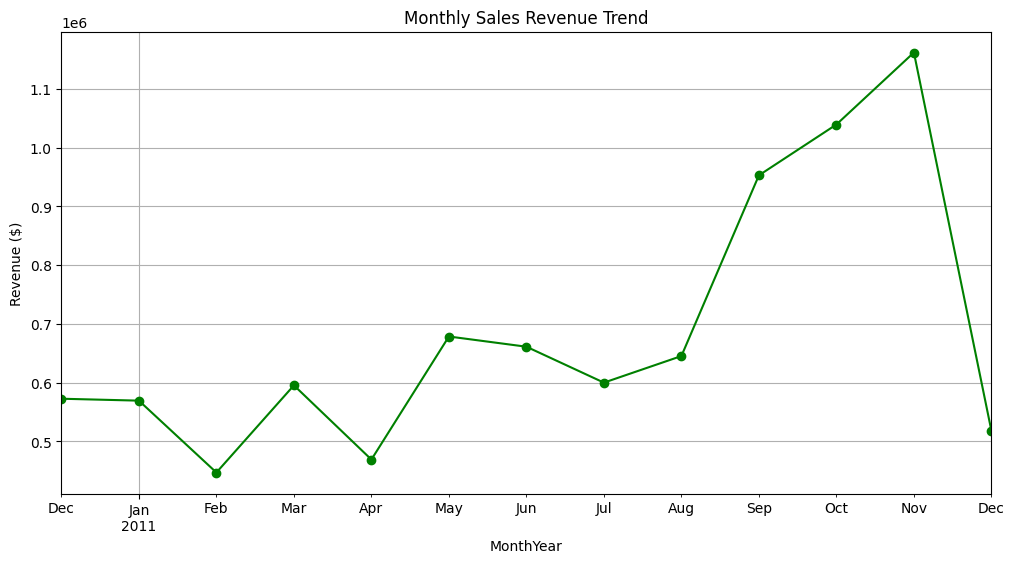

In [4]:
import matplotlib.pyplot as plt

# 1. Group by Country and sum the TotalSales, then pick the top 10
top_countries = df.groupby('Country')['TotalSales'].sum().sort_values(ascending=False).head(10)

# 2. Plot the Country Data
plt.figure(figsize=(10,6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Revenue')
plt.ylabel('Revenue ($)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

# 3. Monthly Trend (Converting Date to 'Year-Month' format)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('MonthYear')['TotalSales'].sum()

# 4. Plot the Monthly Trend
plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title('Monthly Sales Revenue Trend')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()